In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [111]:
xls = pd.ExcelFile('/Users/deniszagorodnev/Desktop/CASE/BDD.xlsx')

macro = pd.read_excel(xls, 'Macro', na_values='?')
i_objective = pd.read_excel(xls, 'Лист1', na_values='?')
i_satisfaction = pd.read_excel(xls, 'Лист2', na_values='?')
i_perception = pd.read_excel(xls, 'Лист3', na_values='?')


In [112]:
macro = macro.sort_values(by=['City'])
macro_origin_features = macro.columns
macro.head(5)

,City,"Population, people","City area (defined for current study), sq km","GDP per capita, thsd USD PPP",Number of personal vehicles per 1000 citizen,"Modal share of public transport, %","Average Monthly Net Salary (After Tax), USD"
19,Bangkok,8305218,1867.195354,23.246405,206.0,0.43,801.31
23,Beijing,18766000,1360.600254,23.390000,260.0,0.50,1251.44
7,Berlin,3671000,891.408662,36.259000,334.0,0.26,2567.51
10,Buenos Aires,2894223,210.934258,23.606000,314.0,0.84,842.24
6,Chicago,2704958,620.583798,58.861000,436.0,0.13,3673.97


In [113]:
macro.columns = ['M' + str(i) for i in range(1, 8)] 

macro.corr()
#корреляция внутри признаков внутри macro практически отстуствует

,M2,M3,M4,M5,M6,M7
M2,1.000000,0.404166,-0.271255,-0.365387,-0.023075,-0.342255
M3,0.404166,1.000000,0.086025,0.218063,-0.532667,0.155375
M4,-0.271255,0.086025,1.000000,0.262657,-0.051903,0.835578
M5,-0.365387,0.218063,0.262657,1.000000,-0.430140,0.299747
M6,-0.023075,-0.532667,-0.051903,-0.430140,1.000000,-0.312140
M7,-0.342255,0.155375,0.835578,0.299747,-0.312140,1.000000


In [114]:
cities1 = np.asarray(i_objective.City)
cities2 = np.asarray(i_satisfaction.City)
cities3 = np.asarray(i_perception.City)


all_cities = np.intersect1d(np.intersect1d(cities1, cities2), cities3)
all_cities

array(['Bangkok', 'Beijing', 'Berlin', 'Buenos Aires', 'Chicago',
       'Hong Kong', 'Istanbul', 'Johannesburg', 'London', 'Los Angeles',
       'Madrid', 'Mexico City', 'Milan', 'Moscow', 'New York', 'Paris',
       'Sao Paulo', 'Seoul', 'Shanghai', 'Singapore', 'St. Petersburg',
       'Sydney', 'Tokyo', 'Toronto'], dtype=object)

In [115]:
i_objective.columns = ['IO' + str(i) for i in range(1, 16)] 

i_objective.corr()

i_objective = i_objective.sort_values(by=['IO1'])


print(np.sort(np.unique(np.asarray(i_objective.corr())))[-10:])
i_objective.head(5)
#корреляция признаков внутри практически отстуствует

[0.57375772 0.57693358 0.58180007 0.58916373 0.59500998 0.60978819
 0.61481645 0.64840207 0.65162441 1.        ]


,IO1,IO2,IO3,IO4,IO5,IO6,IO7,IO8,IO9,IO10,IO11,IO12,IO13,IO14,IO15
23,Bangkok,0.120593,0.442133,0.204073,0.020191,0.320000,0.703508,0.326901,0.089045,0.148379,0.920364,0.328964,0.078917,0.224553,0.225480
11,Beijing,0.526292,0.903434,0.360692,0.449836,0.563333,1.000000,0.568697,0.475115,0.391471,0.432832,0.619627,0.453118,0.731327,0.252701
10,Berlin,0.274552,0.841729,0.646199,0.743788,0.190000,0.695127,0.445955,0.817609,0.462275,0.815977,0.494229,0.249828,0.826389,0.457258
15,Buenos Aires,0.422493,0.743557,0.467567,0.078232,0.000000,0.810640,0.221250,0.680404,0.261358,0.857143,0.435595,0.416645,0.742107,0.659071
6,Chicago,0.585523,0.829729,0.816856,0.318600,0.476667,0.957253,0.444431,0.618510,0.272502,0.732301,0.557727,0.354756,0.684582,0.635192


In [116]:
#Уберем наиболее коррелирующие признаки. Можно и не убирать.

corr_matrix = i_objective.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]
i_objective_new = i_objective.drop(i_objective[to_drop], axis=1)


corr_matrix = macro.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]
macro_new = macro.drop(macro[to_drop], axis=1)


In [117]:
i_satisfaction.columns = ['IS' + str(i) for i in range(1, 16)] 
i_satisfaction = i_satisfaction.sort_values(by=['IS1'])

np.sort(np.unique(np.asarray(i_satisfaction.corr())))[-10:]

#очень сильная корреляция сразу в нескольких факторах. Не используем.

array([0.84695652, 0.85478261, 0.85913043, 0.86      , 0.86782609,
       0.87217391, 0.88782609, 0.89304348, 0.92173913, 1.        ])

In [118]:
i_perception.columns = ['IP' + str(i) for i in range(1, 16)] 
i_perception = i_perception.sort_values(by=['IP1'])

np.sort(np.unique(np.asarray(i_perception.corr())))[-10:]

np.mean(i_perception.corr().mean())

#очень сильная корреляция сразу в нескольких факторах. Не используем.

0.5630434782608696

In [119]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(macro, alpha=0.05, figsize=(10, 10));

In [120]:
#проверим корреляцию между тремя субъективными выборками.

for IO in i_objective.columns:
    for IP in i_perception.columns:
        if IO != 'IO1' and IP != 'IP1':
            res = np.unique(np.corrcoef(np.stack((i_objective[IO], i_perception[IP]))))
            #print(res)
    
#видно, что корреляция между таблицами IO и IP пренебрежимо мала.


In [121]:
for IO in i_objective.columns:
    for IS in i_satisfaction.columns:
        if IO != 'IO1' and IS != 'IS1':
            res = np.unique(np.corrcoef(np.stack((i_objective[IO], i_satisfaction[IS]))))
            #print(res)
            
#относительно высокая корреляция

In [122]:
for IP in i_perception.columns:
    for IS in i_satisfaction.columns:
        if IP != 'IP1' and IS != 'IS1':
            res = np.unique(np.corrcoef(np.stack((i_perception[IP], i_satisfaction[IS]))))
            #print(res)
            
#низкая корреляция

In [123]:
#ЗАДАЧА 1. Пусть выборка это macro а класс это набор выставляемых государством задач.


In [124]:
xls_res = pd.ExcelFile('/Users/deniszagorodnev/Desktop/CASE/ach.xlsx')
tasks = pd.read_excel(xls_res, 'Задачи', na_values='?')

tasks_columns_origin = tasks.columns

#Города, информация о которых у нас есть:
cur_cities = np.array(tasks['Город'])


tasks = tasks.sort_values(by=['Город'])
tasks.head(3)

,Город,Повышение качества транспортного обслуживания населения,Повышение эффективности транспортной системы,Повышение экологичности и безопасности ТС,"Развитие общественного транспорта, вело и пешех0го движ0ия",Повышение безопасности дорожного движеиня,Уменьшение средней длительности передвижений по городу,Улучшение транспортной инфраструктуры,Развитие системы совместного использования,Развитие беспилотного транспорта,Повышение комфорта поездок,Диджитализация,Популяризация электротранспорта,Сокращение трансопртного потока
18,Bangkok,0,1,1,1,0,0,0,0,0,0,0,0,0
22,Beijing,0,0,0,1,0,0,1,0,0,0,0,1,0
7,Berlin,1,0,0,0,0,0,0,0,1,0,0,0,0


In [125]:
tasks.columns = ['T' + str(i) for i in range(1, 15)] 

y_tasks = tasks.drop(tasks[['T1']], axis = 1)

In [126]:
#Тестовый вектор для Москвы:

x_macro = macro.loc[macro['M1'] == 'Moscow']
x_macro = np.array(x_macro.drop(x_macro[['M1']], axis = 1))

In [127]:
X_macro = macro.loc[macro['M1'].isin(cur_cities)]

In [128]:
X_macro = X_macro.drop(X_macro[['M1']], axis = 1)
feature_names = X_macro.columns

In [129]:
from sklearn import ensemble

rf = ensemble.RandomForestClassifier(n_estimators=1500, random_state=11)

rf.fit(X_macro, y_tasks)
res_tasks = rf.predict(x_macro)
res_tasks

array([[0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.]])

In [130]:
for i in range(len(res_tasks[0])):
    if res_tasks[0][i] == 1:
        print(tasks_columns_origin[i+1])

Повышение безопасности дорожного движеиня
Улучшение транспортной инфраструктуры
Популяризация электротранспорта


In [131]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# 3 наиболее значимых признаков
best_features = indices[:3]
best_features_names = feature_names[best_features]

for i in np.array(best_features_names):
    print(macro_origin_features[int(i[1])-1])



Number of personal vehicles per 1000 citizen
Average Monthly Net Salary (After Tax), USD
Population, people


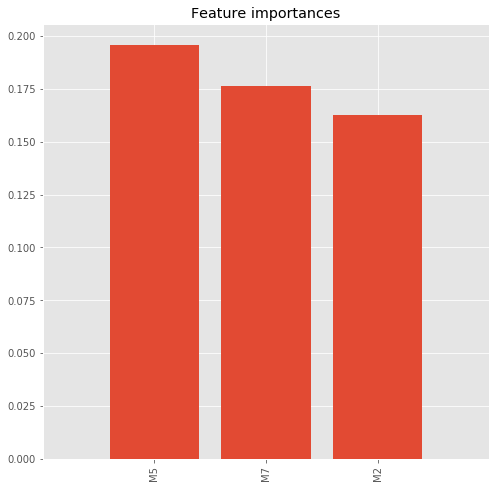

In [132]:
#Диаграмма значимости признаков
d_first = 3
plt.figure(figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [133]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_macro, y_tasks, test_size = 0.7, random_state = 11)

rf = ensemble.RandomForestClassifier(n_estimators=1500, random_state=11)

rf.fit(X_train, y_train)
res_tasks = rf.predict(x_macro)
for i in range(len(res_tasks[0])):
    if res_tasks[0][i] == 1:
        print(tasks_columns_origin[i+1])

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Повышение экологичности и безопасности ТС
Повышение безопасности дорожного движеиня
Улучшение транспортной инфраструктуры
Развитие системы совместного использования
Популяризация электротранспорта


In [134]:
y_train_predict = rf.predict(X_train)
y_test_predict = rf.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

err_test

T2     0.352941
T3     0.529412
T4     0.647059
T5     0.470588
T6     0.529412
T7     0.117647
T8     0.470588
T9     0.647059
T10    0.235294
T11    0.058824
T12    0.176471
T13    0.647059
T14    0.117647
dtype: float64

In [509]:
from scipy.stats import entropy
entropy(y_test, y_test_predict+1e-9)

array([1.04145387, 0.63598877, 9.42039615, 4.14702482, 3.65361373,
       2.14006616, 4.14702482, 1.54044504, 1.44691898, 2.83321334,
       1.73460106, 1.32175584, 2.14006616])

In [508]:
def cross_entropy(predictions, targets):

    ce = -np.sum(targets*np.log(predictions+1e-9))
    return ce


cross_entropy(y_test, y_test_predict)


T2      -0.000000
T3      -0.000000
T4     165.786127
T5     145.062861
T6     165.786127
T7      -0.000000
T8     145.062861
T9     227.955924
T10     -0.000000
T11     -0.000000
T12     -0.000000
T13    227.955924
T14     -0.000000
dtype: float64

In [510]:
y_test_predict

array([[0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 1., 

In [311]:
from sklearn.multioutput import MultiOutputRegressor

MOR = MultiOutputRegressor(estimator = rf)

MOR.fit(X_macro, y_tasks)
res_tasks = MOR.predict(x_macro)
for i in range(len(res_tasks[0])):
    if res_tasks[0][i] == 1:
        print(tasks_columns_origin[i+1])

Развитие общественного транспорта, вело и пешех0го движ0ия
Улучшение транспортной инфраструктуры
Популяризация электротранспорта


In [318]:
X_train, X_test, y_train, y_test = train_test_split(X_macro, y_tasks, test_size = 0.7, random_state = 11)

rf = ensemble.RandomForestClassifier(n_estimators=1500, random_state=11)

MOR = MultiOutputRegressor(estimator = rf)

MOR.fit(X_train, y_train)


y_train_predict = MOR.predict(X_train)
y_test_predict = MOR.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

max(err_test)

0.8235294117647058

In [ ]:
#ЗАДАЧА 2. Пусть выборка это i_objective а класс это набор достижений.

In [337]:
i_objective.head()

,IO1,IO2,IO3,IO4,IO5,IO6,IO7,IO8,IO9,IO10,IO11,IO12,IO13,IO14,IO15
23,Bangkok,0.120593,0.442133,0.204073,0.020191,0.320000,0.703508,0.326901,0.089045,0.148379,0.920364,0.328964,0.078917,0.224553,0.225480
11,Beijing,0.526292,0.903434,0.360692,0.449836,0.563333,1.000000,0.568697,0.475115,0.391471,0.432832,0.619627,0.453118,0.731327,0.252701
10,Berlin,0.274552,0.841729,0.646199,0.743788,0.190000,0.695127,0.445955,0.817609,0.462275,0.815977,0.494229,0.249828,0.826389,0.457258
15,Buenos Aires,0.422493,0.743557,0.467567,0.078232,0.000000,0.810640,0.221250,0.680404,0.261358,0.857143,0.435595,0.416645,0.742107,0.659071
6,Chicago,0.585523,0.829729,0.816856,0.318600,0.476667,0.957253,0.444431,0.618510,0.272502,0.732301,0.557727,0.354756,0.684582,0.635192


In [461]:
#Тестовый вектор в виде максимума всех мнений:

y_obj_expected = np.array([10]*14)

In [462]:
xls_res = pd.ExcelFile('/Users/deniszagorodnev/Desktop/CASE/ach.xlsx')
achs = pd.read_excel(xls_res, 'Достижения', na_values='?')

achs_columns_origin = achs.columns

#Города, информация о которых у нас есть:
cur_cities = np.array(achs['Город'])


achs = achs.sort_values(by=['Город'])
achs.head(3)

,Город,Уровень развития,Интермодальность,Высокий уровень безопасности,Эффективность системы назем. транспорта,Удобство билетной системы,Финансовая доступность,Снижение транспортного потока / эффективность системы личного транспорта,Расширение пеш0х и велосипедных зон,Развитие электронных сервисов,Улучшение экологической обстановки,Развитие системы транспорта совместного испольщовния,Увеличение доступности общественного транспорта / расширение сети общ транспрота,Комфорт в пути,Доступность рельсового транспорта
18,Bangkok,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22,Beijing,0,0,0,0,0,1,0,0,1,1,1,0,0,0
7,Berlin,1,1,0,0,0,0,1,1,1,0,1,0,0,0


In [463]:
achs.columns = ['A' + str(i) for i in range(1, 16)] 

X_achs = achs.drop(achs[['A1']], axis = 1)
feature_names = X_achs.columns

In [464]:
y_obj = i_objective.loc[i_objective['IO1'].isin(cur_cities)]

y_obj = y_obj.drop(y_obj[['IO1']], axis = 1)


In [465]:
from sklearn import preprocessing
rf = ensemble.RandomForestClassifier(n_estimators=1500, random_state=11)
le = preprocessing.LabelEncoder()

#y_obj_enc = lab_enc.fit_transform(y_obj)
y_obj_enc = y_obj.apply(le.fit_transform)

rf.fit(X_achs, y_obj_enc)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=1,
            oob_score=False, random_state=11, verbose=0, warm_start=False)

In [474]:

x_obj_initial = np.array([1]*14)
x_obj_initial = np.reshape(x_obj_initial, (-1, 14))


def opt_fun(x_obj):
    
    res_achs = rf.predict(np.reshape(x_obj, (-1, 14))) - y_obj_expected
    return np.sum(res_achs**2)

In [475]:
np.sum((rf.predict(x_obj_initial) -  y_obj_expected)**2) 

348.0

In [477]:
from scipy.optimize import minimize
res = minimize(opt_fun, x_obj_initial, method='nelder-mead')

In [478]:
res.x

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [479]:
#ЗАДАЧА 2. Вариант 2.

In [488]:
y_obj = i_objective.loc[i_objective['IO1'].isin(cur_cities)]

y_obj = y_obj.drop(y_obj[['IO1']], axis = 1)

y_obj = y_obj.round(6)
y_obj = y_obj.mul(1000000)

y_obj = y_obj.astype('int32')

y_obj.head()

,IO2,IO3,IO4,IO5,IO6,IO7,IO8,IO9,IO10,IO11,IO12,IO13,IO14,IO15
23,120593,442133,204073,20191,320000,703508,326901,89045,148379,920364,328964,78917,224553,225480
11,526292,903434,360692,449836,563333,1000000,568697,475115,391471,432832,619627,453118,731327,252701
10,274552,841729,646199,743788,190000,695127,445955,817609,462275,815977,494229,249828,826389,457258
15,422493,743557,467567,78232,0,810640,221250,680404,261357,857143,435595,416645,742107,659071
6,585523,829729,816856,318600,476667,957253,444431,618510,272502,732301,557727,354756,684582,635192


In [490]:
y_obj_expected = np.array([1000000]*14)

In [491]:
xls_res = pd.ExcelFile('/Users/deniszagorodnev/Desktop/CASE/ach.xlsx')
achs = pd.read_excel(xls_res, 'Достижения', na_values='?')

achs_columns_origin = achs.columns

#Города, информация о которых у нас есть:
cur_cities = np.array(achs['Город'])


achs = achs.sort_values(by=['Город'])
achs.head(3)

,Город,Уровень развития,Интермодальность,Высокий уровень безопасности,Эффективность системы назем. транспорта,Удобство билетной системы,Финансовая доступность,Снижение транспортного потока / эффективность системы личного транспорта,Расширение пеш0х и велосипедных зон,Развитие электронных сервисов,Улучшение экологической обстановки,Развитие системы транспорта совместного испольщовния,Увеличение доступности общественного транспорта / расширение сети общ транспрота,Комфорт в пути,Доступность рельсового транспорта
18,Bangkok,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22,Beijing,0,0,0,0,0,1,0,0,1,1,1,0,0,0
7,Berlin,1,1,0,0,0,0,1,1,1,0,1,0,0,0


In [492]:
achs.columns = ['A' + str(i) for i in range(1, 16)] 

X_achs = achs.drop(achs[['A1']], axis = 1)
feature_names = X_achs.columns

In [493]:
rf = ensemble.RandomForestClassifier(n_estimators=1500, random_state=11)

rf.fit(X_achs, y_obj)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=1,
            oob_score=False, random_state=11, verbose=0, warm_start=False)

In [494]:
x_obj_initial = np.array([1]*14)
x_obj_initial = np.reshape(x_obj_initial, (-1, 14))


def opt_fun(x_obj):
    
    res_achs = rf.predict(np.reshape(x_obj, (-1, 14))) - y_obj_expected
    return np.sum(res_achs**2)

In [495]:
from scipy.optimize import minimize
res = minimize(opt_fun, x_obj_initial, method='nelder-mead')

In [496]:
res.x

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [80]:
xls = pd.ExcelFile('/Users/deniszagorodnev/Desktop/CASE/BDD.xlsx')


i_satisfaction = pd.read_excel(xls, 'Лист2', na_values='?')


i_satisfaction.columns = ['IS' + str(i) for i in range(1, 16)] 
i_satisfaction = i_satisfaction.sort_values(by=['IS1'])

i_satisfaction

,IS1,IS2,IS3,IS4,IS5,IS6,IS7,IS8,IS9,IS10,IS11,IS12,IS13,IS14,IS15
17,Bangkok,7,17,19,22,24,18,18,20,19,6,21,22,21,21
4,Beijing,1,6,14,11,10,10,12,4,4,4,4,12,16,6
5,Berlin,14,2,7,9,5,6,16,8,15,11,15,4,2,4
19,Buenos Aires,20,22,20,18,21,21,23,19,21,20,19,20,19,20
3,Chicago,6,5,4,1,1,11,3,5,13,2,13,2,7,8
10,Hong Kong,18,8,3,19,11,4,11,11,5,14,8,6,13,7
21,Istanbul,23,21,23,24,20,20,20,24,20,24,20,19,18,19
20,Johannesburg,17,20,16,23,19,19,21,22,23,16,22,21,23,24
0,London,4,3,2,3,2,1,8,3,3,3,3,1,1,2
9,Los Angeles,2,9,11,6,15,13,5,7,12,1,14,11,20,15


Город с самыми довольными людьми:

In [81]:
i_satisfaction.shape

(24, 15)

In [69]:
i_satisfaction = i_satisfaction.drop(i_satisfaction[['IS1']], axis = 1)


In [70]:
i_satisfaction["sum"] = i_satisfaction.sum(axis=1)

In [71]:
i_satisfaction['sum'].argmax()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


23

In [83]:
xls = pd.ExcelFile('/Users/deniszagorodnev/Desktop/CASE/BDD.xlsx')


i_satisfaction = pd.read_excel(xls, 'Лист2', na_values='?')


i_satisfaction.columns = ['IS' + str(i) for i in range(1, 16)] 
i_satisfaction = i_satisfaction.sort_values(by=['IS1'])


i_satisfaction = i_satisfaction.loc[i_satisfaction['IS1'].isin(cur_cities)]
i_satisfaction = i_satisfaction.drop(i_satisfaction[['IS1']], axis = 1)
i_satisfaction["sum"] = i_satisfaction.sum(axis=1)

In [84]:
i_satisfaction['sum'].argmax()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


23

Самый ближайший город по трем главным фичам:

In [99]:
best_features_names

Index(['M5', 'M7', 'M2'], dtype='object')

In [86]:
for i in np.array(best_features_names):
    print(macro_origin_features[int(i[1])-1])

Number of personal vehicles per 1000 citizen
Average Monthly Net Salary (After Tax), USD
Population, people


In [90]:
macro

,M1,M2,M3,M4,M5,M6,M7
19,Bangkok,8305218,1867.195354,23.246405,206.000000,0.430,801.31
23,Beijing,18766000,1360.600254,23.390000,260.000000,0.500,1251.44
7,Berlin,3671000,891.408662,36.259000,334.000000,0.260,2567.51
10,Buenos Aires,2894223,210.934258,23.606000,314.000000,0.840,842.24
6,Chicago,2704958,620.583798,58.861000,436.000000,0.130,3673.97
22,Hong Kong,7409800,90.032153,57.244000,63.000000,0.900,2651.41
15,Istanbul,15029231,787.201098,24.867000,181.372397,0.241,667.65
20,Johannesburg,4434827,1644.048803,16.370000,165.000000,0.130,1960.25
17,London,8400000,1607.072587,57.157000,213.000000,0.370,3236.84
1,Los Angeles,10137915,4587.133687,65.082000,641.000000,0.050,3436.27


In [89]:
x_macro

array([[1.23807000e+07, 1.09605109e+03, 4.58030000e+01, 3.16000000e+02,
        6.40000000e-01, 1.05879000e+03]])

In [88]:
X_macro

,M2,M3,M4,M5,M6,M7
19,8305218,1867.195354,23.246405,206.000000,0.430,801.31
23,18766000,1360.600254,23.390000,260.000000,0.500,1251.44
7,3671000,891.408662,36.259000,334.000000,0.260,2567.51
10,2894223,210.934258,23.606000,314.000000,0.840,842.24
6,2704958,620.583798,58.861000,436.000000,0.130,3673.97
22,7409800,90.032153,57.244000,63.000000,0.900,2651.41
15,15029231,787.201098,24.867000,181.372397,0.241,667.65
20,4434827,1644.048803,16.370000,165.000000,0.130,1960.25
17,8400000,1607.072587,57.157000,213.000000,0.370,3236.84
1,10137915,4587.133687,65.082000,641.000000,0.050,3436.27


In [106]:
res = []
for index, row in X_macro.iterrows():
    x = row[best_features_names[0]] - x_macro[0][3]
    y = row[best_features_names[1]] - x_macro[0][5]
    z = row[best_features_names[2]] - x_macro[0][0]
    res.append(np.sqrt(x**2 + y**2 + z**2))
    print(index, np.sqrt(x**2 + y**2 + z**2))

19 4075482.0096179973
23 6385300.003151773
7 8709700.13069107
10 9486477.002471829
6 9675742.354162311
22 4970900.26156706
15 2648531.0323037733
20 7945873.052570129
17 3980700.597195273
1 2242786.283679555
2 9215159.05947992
13 3505700.016175095
0 9162499.044805365
12 3843028.214439081
4 5380700.332147331
14 342700.2524900221
11 2256121.594904411
18 11802600.003770273
21 6768400.355544621
8 7099100.0056474
5 7350932.60556537
16 3139700.657541863
3 9649129.131495398


In [108]:
min(res)

342700.2524900221